In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

***The dataset consists of `150 samples of iris flowers`, each belonging to one of three species: `Setosa`, `Versicolor`, and `Virginica`. For each sample, four features are provided, which are measurements in centimeters:***

 - Sepal length
 - Sepal width
 - Petal length
 - Petal width

***These features are used to predict the species of the iris flower. Here's a summary of the dataset:***

 - Classes (Species): Setosa, Versicolor, Virginica
 - Number of Samples: 150 (50 samples per class)
 - Number of Features: 4 (Sepal length, Sepal width, Petal length, Petal width)
 - Data Type: Numerical (Continuous)

In [3]:
from sklearn.datasets import load_iris

# load the dataset
iris = load_iris()
features = iris.data
labels = iris.target

In [4]:
# split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.3,random_state=16)

In [5]:
k = 5 # number of neighbors

In [6]:
# initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')


In [7]:
# Train the KNN classifier
knn.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean')

In [8]:
# prediction on the test set
prediction = knn.predict(xtest)

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [10]:
# calculate the accuracy
accuracy = accuracy_score(ytest,prediction)

In [11]:
print("Accuracy: {}".format(accuracy*100))

Accuracy: 95.55555555555556


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### ***Ploting the Neighbors***

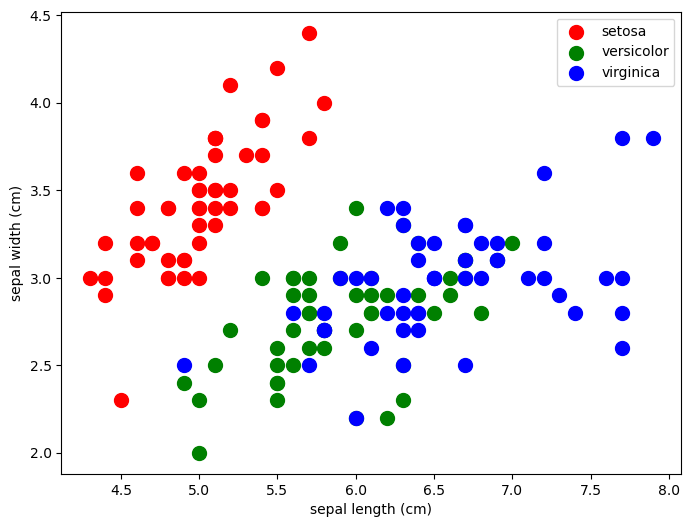

In [13]:
import matplotlib.pyplot as plt


# Define the colors for each class
colors = ['r', 'g', 'b']

# Plotting only the first two features
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(features[labels == i, 0], features[labels == i, 1],c=colors[i], marker='o', s=100, label=iris.target_names[i])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

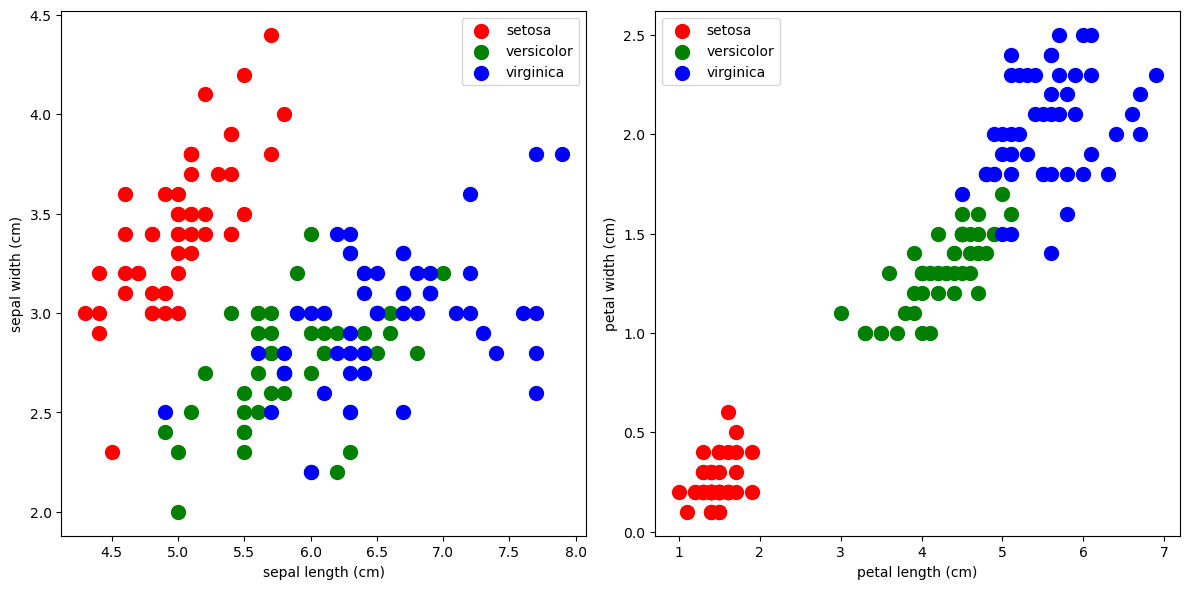

In [14]:
# Define the colors for each class
colors = ['r', 'g', 'b']

# Plotting the first two features
plt.figure(figsize=(12, 6))  # Adjust figure size to accommodate two subplots

# Subplot for the first two features
plt.subplot(1, 2, 1)
for i in range(len(iris.target_names)):
    plt.scatter(features[labels == i, 0], features[labels == i, 1],
                c=colors[i], marker='o', s=100, label=iris.target_names[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

# Subplot for the remaining two features (petal length, petal width)
plt.subplot(1, 2, 2)
for i in range(len(iris.target_names)):
    plt.scatter(features[labels == i, 2], features[labels == i, 3],
                c=colors[i], marker='o', s=100, label=iris.target_names[i])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

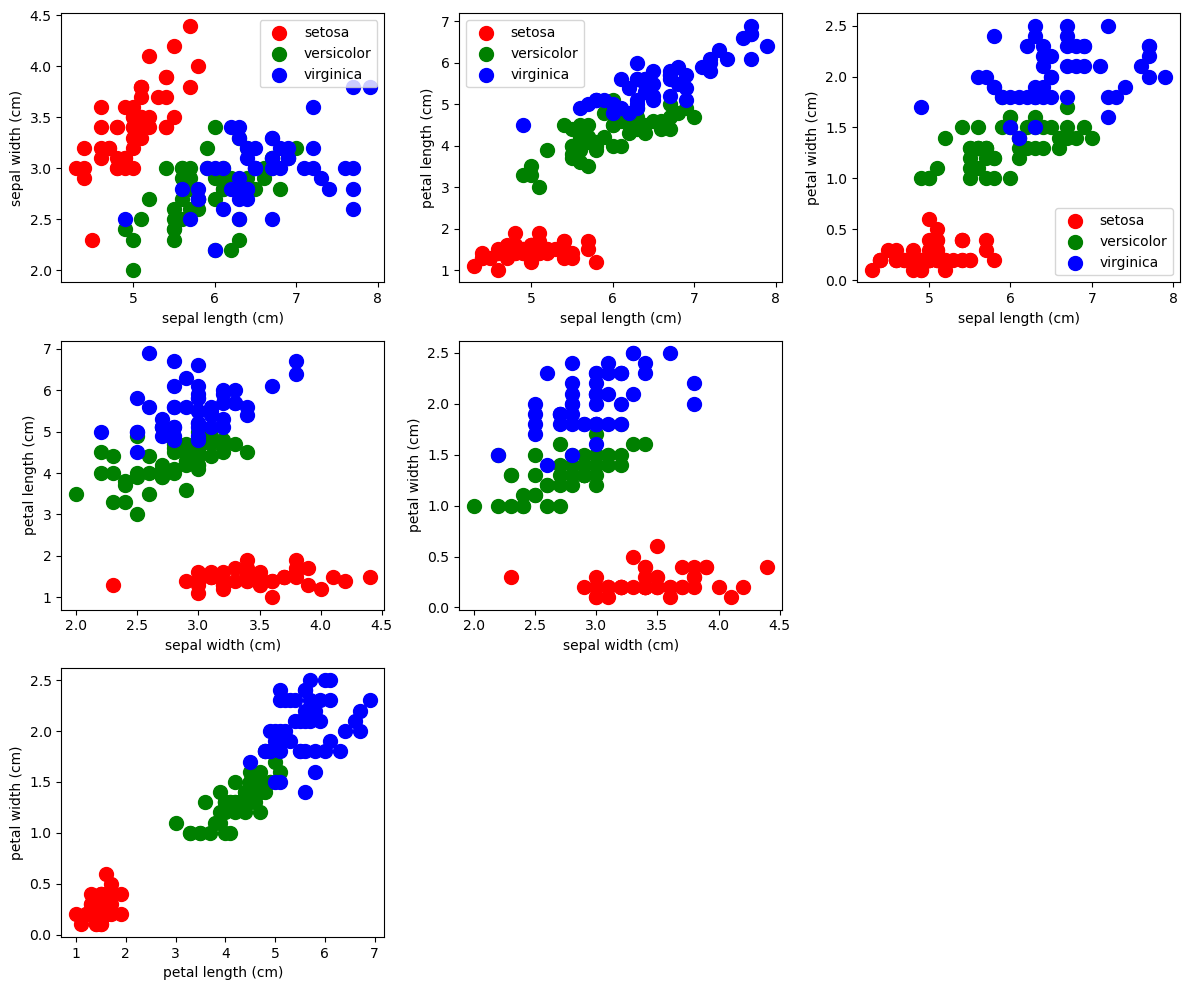

In [15]:
# Define the colors for each class
colors = ['r', 'g', 'b']

# Number of features (including sepal and petal)
n_features = features.shape[1]

# Create a figure for subplots (adjust figsize for better visualization)
plt.figure(figsize=(12, 10))

# Loop through all feature combinations
for i in range(n_features):
    for j in range(i + 1, n_features):  # Skip duplicate plots (i vs i)
        # Create subplot for each combination
        plt.subplot(n_features - 1, n_features - 1,
                    (i * (n_features - 1)) + j - i)
        for k in range(len(iris.target_names)):
            # Scatter plot for each class with corresponding color and label
            plt.scatter(features[labels == k, i], features[labels == k, j],
                        c=colors[k], marker='o', s=100, label=iris.target_names[k])
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        if i == 0:  # Add legend only to the first column subplots
            plt.legend()
        plt.tight_layout()  # Adjust spacing between subplots

plt.show()

#### ***Prediction on Un-Seen Data Points:***

***Unseen Data Points:***
 - Sepal Length: 5.1
 - Sepal Width: 3.5
 - Petal Length: 1.4
 - Petal Width: 0.2

 ***Output:***
  - 0: Setosa
  - 1: Versicolor
  - 2: Virginica

In [16]:
# Predicting on unseen data
data_point1 = [[5.1, 3.5, 1.4, 0.2]]
data_point2 = [[6.0, 2.7, 5.1, 1.6]]
data_point3 = [[6.9, 3.1, 5.4, 2.1]]


# Predict the label for the new data point
def predict_species(data_point):
    predicted_label = knn.predict(data_point)
    if predicted_label[0] == 0:
        print("Belongs to Setosa species")
    elif predicted_label[0] == 1:
        print("Belongs to Versicolor species")
    elif predicted_label[0] == 2:
        print("Belongs to Virginica species")
    else:pass

In [17]:
predict_species(data_point3)

Belongs to Virginica species
